In [27]:
from igraph import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
data = pd.read_csv("../Outdata/FoldChangePvalues.csv", index_col=0)
data.replace("*", 1, inplace=True)
data = data.apply(pd.to_numeric)
max_clique = []#['Duan2021', 'Keller2020', 'Jin2017', 'Halvorsen2016']

In [12]:
data

,Asakura2020,Bianchi2011,Boeri2011,Chen2019,Duan2021,Fehlmann2020,Halvorsen2016,Jin2017,Keller2009,Keller2014,...,Li2017,Marzi2016,Nigita2018,Patnaik2012,Patnaik2017,Qu2017,Reis2020,Wozniak2015,Yao2019,Zaporozhchenko2018
Asakura2020,1.000000e+00,0.526856,0.300494,0.531423,0.098337,1.318819e-02,0.273233,0.106308,7.216506e-01,1.856713e-07,...,0.034637,0.550069,0.353235,4.091394e-02,0.593873,0.189520,5.659865e-03,5.471760e-03,0.844661,0.904164
Bianchi2011,5.268559e-01,1.000000,0.241642,0.901652,1.000000,2.637128e-01,0.334250,0.350682,7.049919e-02,2.171943e-01,...,1.000000,0.029213,0.277465,5.199720e-01,0.666714,1.000000,9.879374e-01,1.971685e-02,0.246987,1.000000
Boeri2011,3.004936e-01,0.241642,1.000000,0.004588,0.822156,5.345050e-01,0.541470,0.958930,7.888726e-02,8.879085e-01,...,0.073826,0.417283,0.391045,3.495758e-03,0.657341,0.002264,6.050855e-01,6.574522e-01,0.024508,0.369938
Chen2019,5.314228e-01,0.901652,0.004588,1.000000,0.394045,1.020614e-05,0.023805,0.371996,8.643399e-03,4.763387e-01,...,0.986356,0.567897,0.794635,1.126426e-02,0.935823,0.250703,1.217854e-01,2.052464e-01,0.003938,0.066678
Duan2021,9.833690e-02,1.000000,0.822156,0.394045,1.000000,9.869392e-01,0.379959,0.980973,6.337379e-01,4.201957e-02,...,0.231637,1.000000,0.289162,1.687724e-01,0.432514,0.766825,1.487915e-01,5.627001e-01,0.188904,0.033478
Fehlmann2020,1.318819e-02,0.263713,0.534505,0.000010,0.986939,1.000000e+00,0.050257,0.989035,1.402845e-04,7.003200e-10,...,0.004238,0.219012,0.223189,1.955406e-08,0.058062,0.001058,3.300677e-07,6.652897e-03,0.037560,0.548821
Halvorsen2016,2.732335e-01,0.334250,0.541470,0.023805,0.379959,5.025737e-02,1.000000,0.272922,2.975323e-01,2.136926e-01,...,0.868302,0.391031,0.189150,3.764048e-01,0.502038,0.064128,3.150099e-01,8.358915e-01,0.227430,0.951052
Jin2017,1.063075e-01,0.350682,0.958930,0.371996,0.980973,9.890353e-01,0.272922,1.000000,3.918265e-01,5.417846e-01,...,0.854801,0.491401,0.900196,1.800023e-02,0.358331,0.485239,1.109773e-01,7.256500e-01,0.312978,0.136447
Keller2009,7.216506e-01,0.070499,0.078887,0.008643,0.633738,1.402845e-04,0.297532,0.391826,1.000000e+00,1.051923e-10,...,0.307782,0.809984,0.428449,1.002930e-02,0.016272,0.722335,1.175700e-01,2.072665e-01,0.849907,0.689491
Keller2014,1.856713e-07,0.217194,0.887908,0.476339,0.042020,7.003200e-10,0.213693,0.541785,1.051923e-10,1.000000e+00,...,0.307179,0.899237,0.267852,1.603856e-02,0.029515,0.448838,7.123977e-01,7.480514e-01,0.005127,0.796319


In [21]:
studies = pd.read_csv("../Outdata/studies_table.csv", index_col=0)
studies

,Technology,uniform,weighted,mirnas,cases,controls,total
Study,,,,,,,
Asakura2020,Microarray,0.094473,0.104055,2565,1566,2178,3744
Bianchi2011,Microarray,0.052498,0.054998,25,95,117,212
Boeri2011,Microarray,0.043976,0.041571,131,19,6,25
Chen2019,Sequencing,0.061379,0.070752,253,30,24,54
Duan2021,Microarray,0.318835,0.446064,400,6,6,12
Fehlmann2020,Microarray,0.018791,0.019101,388,606,964,1570
Halvorsen2016,Microarray,0.133401,0.184505,147,38,32,70
Jin2017,qRT-PCR,0.119586,0.163644,186,26,12,38
Keller2009,Microarray,0.095001,0.107436,386,17,19,36


In [22]:
g = Graph()

In [23]:
g.add_vertices(len(data))

In [24]:
g.vs["name"] = data.columns

In [25]:
for i in range(len(data)):
    for j in range(i+1, len(data)):
        if data.iloc[i, j] <= 0.05:
            g.add_edges([(i, j)])


In [26]:
print(g)

IGRAPH UN-- 25 66 --
+ attr: name (v)
+ edges (vertex names):
       Asakura2020 -- Fehlmann2020, Keller2014, Keller2020, Leidinger2011,
Leidinger2014, Li2017, Patnaik2012, Reis2020, Wozniak2015
       Bianchi2011 -- Marzi2016, Wozniak2015
         Boeri2011 -- Chen2019, Patnaik2012, Qu2017, Yao2019
          Chen2019 -- Boeri2011, Fehlmann2020, Halvorsen2016, Keller2009,
Leidinger2016, Patnaik2012, Yao2019
          Duan2021 -- Keller2014, Keller2020, Zaporozhchenko2018
      Fehlmann2020 -- Asakura2020, Chen2019, Keller2009, Keller2014,
Leidinger2011, Leidinger2016, Li2017, Patnaik2012, Qu2017, Reis2020,
Wozniak2015, Yao2019
     Halvorsen2016 -- Chen2019
           Jin2017 -- Keller2020, Patnaik2012
        Keller2009 -- Chen2019, Fehlmann2020, Keller2014, Leidinger2011,
Leidinger2016, Patnaik2012, Patnaik2017
        Keller2014 -- Asakura2020, Duan2021, Fehlmann2020, Keller2009,
Leidinger2011, Leidinger2016, Patnaik2012, Patnaik2017, Yao2019
        Keller2020 -- Asakura2020, Duan2

In [40]:
layout = g.layout("fr")

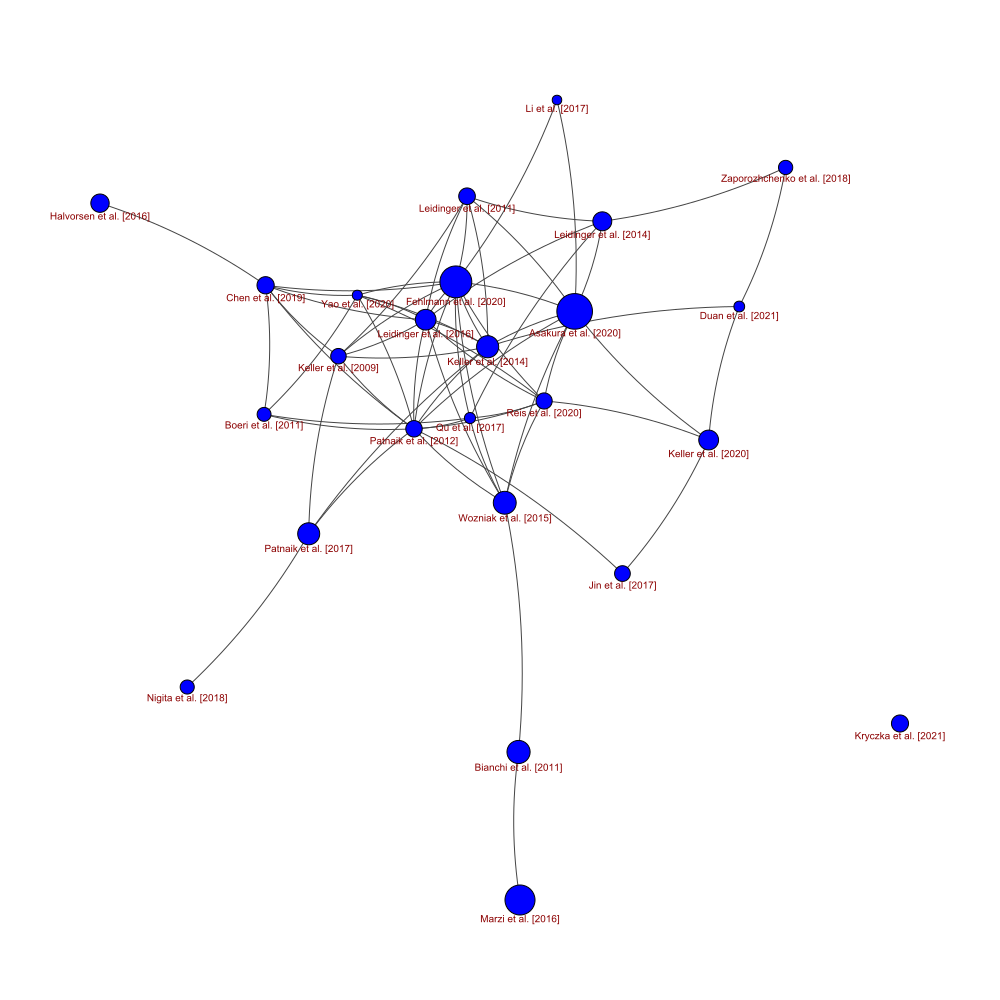

In [47]:
visual_style = {}
visual_style["vertex_size"] = [3*np.log2(studies.loc[name, "total"]) for name in g.vs["name"]]
visual_style["vertex_color"] = ["green" if n in max_clique else "blue" for n in g.vs["name"]]
visual_style["vertex_label"] = [name[:-4] + " et al. [" + name[-4:] + "]" for name in g.vs["name"]]
visual_style["vertex_shape"] = "circle"
visual_style["vertex_label_color"] = "darkred"
visual_style["layout"] = layout
visual_style["bbox"] = (1000, 1000)
visual_style["margin"] = 100
visual_style["edge_curved"] = 0.1
visual_style["vertex_label_dist"] = 1
visual_style["vertex_label_size"] = 10
#fig, ax = plt.subplots()
plot(g, **visual_style)

In [61]:
import network2tikz

In [71]:
layout = g.layout("kk")
layout = {i:tuple(k) for i,k in enumerate(layout.coords)}

In [72]:
visual_style = {}
visual_style["vertex_size"] = 5
visual_style["vertex_color"] = ["green" if n in max_clique else "blue" for n in g.vs["name"]]
visual_style["vertex_label"] = [f"\\citet{{{name}}}" for name in g.vs["name"]]
visual_style["vertex_shape"] = "circle"
visual_style["layout"] = layout
#visual_style["bbox"] = (100, 100)
visual_style['canvas'] = (200,300)
visual_style["margin"] = 0
visual_style["edge_curved"] = 0.1
visual_style['vertex_label_position'] = 'below'
visual_style["node_label_size"] = 70
#fig, ax = plt.subplots()
network2tikz.plot(g, 'out.tex', **visual_style)